# MI PRIMER TRAIN-TEST-PREDICT

Vamos a realizar nuestro primer train-test-predict. Para ello, utilizaremos datos meteorologicos de la ciudad de Madrid para hacer un modelo predictivo de PRECIPITACIONES a D+1.

# Librerias

In [1]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab

pd.set_option('display.max_columns',None)   # para visualizar mas columnas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

# Load dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/lluvia entrenar.csv', index_col=0)

In [5]:
df.shape

(6812, 27)

In [6]:
df.head()

,fecha,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,SW,0,0,0,0,0
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,SE,1,0,0,0,0
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.0,6.0,W,1,1,0,0,0
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,W,0,0,0,0,0
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.0,7.0,N,0,1,0,0,0


In [7]:
df.fecha.min(), df.fecha.max()

('1997-01-01', '2015-12-31')

Tenemos un historico de 1997 hasta 2015 de todo el parte meteorologico diario. Como queremos construir un modelo capaz de predecir si llueve al dia siguiente (D+1), utilizaremos la funcion **shift()** para desplazar 1 fila (=1 dia) cada valor de 'ind_lluvia' en el dataset.

In [8]:
df.set_index('fecha', inplace=True)

In [9]:
df.sort_index(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6812 entries, 1997-01-01 to 2015-12-31
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperatura_max   6810 non-null   float64
 1   temperatura_med   6809 non-null   float64
 2   temperatura_min   6810 non-null   float64
 3   rocio_max         6810 non-null   float64
 4   rocio_med         6810 non-null   float64
 5   rocio_min         6810 non-null   float64
 6   humedad_max       6810 non-null   float64
 7   humedad_med       6810 non-null   float64
 8   humedad_min       6810 non-null   float64
 9   presion_max       6812 non-null   int64  
 10  presion_med       6812 non-null   int64  
 11  presion_min       6812 non-null   int64  
 12  visibilidad_max   5872 non-null   float64
 13  visibilidad_med   5872 non-null   float64
 14  visibilidad_min   5872 non-null   float64
 15  viento_max        6812 non-null   int64  
 16  viento_med        6812 non-null 

In [11]:
df['lluvia_D+1'] = df['ind_lluvia'].shift(-1)

In [12]:
df.head()

,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,lluvia_D+1
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,SW,0,0,0,0,0,1.0
1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,SE,1,0,0,0,0,1.0
1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.0,6.0,W,1,1,0,0,0,0.0
1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,W,0,0,0,0,0,0.0
1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.0,7.0,N,0,1,0,0,0,0.0


# ML Preprocessing (express)

* Pulimos nulos y categóricos (type object), lo minimo para poder modelizar.
* **IMPORTANTE:** Obviaremos la parte de analisis exhaustivo de los datos (EDA), corrección de formatos, gestión de altas correlaciones y bajas varianzas para no demorarnos en el preprocessing pero son steps que se deben realizar para garantizar las condiciones óptimas en el entrenamiento.

## Eliminar duplicados

In [13]:
# Check duplicados
len(df.index.unique())==len(df.index)

True

## Imputar nulos

In [14]:
df.isna().sum()

temperatura_max        2
temperatura_med        3
temperatura_min        2
rocio_max              2
rocio_med              2
rocio_min              2
humedad_max            2
humedad_med            2
humedad_min            2
presion_max            0
presion_med            0
presion_min            0
visibilidad_max      940
visibilidad_med      940
visibilidad_min      940
viento_max             0
viento_med             0
racha_viento_max    3306
precipitacion          0
nubes               1372
viento_dir             0
ind_lluvia             0
ind_nieve              0
ind_truenos            0
ind_niebla             0
ind_granizo            0
lluvia_D+1             1
dtype: int64

In [15]:
# Eliminamos filas sin TARGET informado (seria contraproducente imputar valores al target del que queremos aprender!)
df.dropna(axis=0, subset=['lluvia_D+1'], inplace=True)

In [16]:
# Parece que hay 3 registros sin la temperatura ni la humedad informada, como son MUY POCOS registros optamos por eliminarlos en lugar de imputar un valor (que dios nos perdone!)
df.dropna(axis=0, subset=['temperatura_med'], inplace=True)

In [17]:
#
cols_null = list(df.columns[df.isna().sum() >0])
cols_null

['visibilidad_max',
 'visibilidad_med',
 'visibilidad_min',
 'racha_viento_max',
 'nubes']

In [18]:
for col in cols_null:
  df[col] = df[col].fillna(method='ffill')
  #El ffill lo que hace es relleanr los nulos con el dato del día anterior

In [19]:
df.head()

,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,lluvia_D+1
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,SW,0,0,0,0,0,1.0
1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,SE,1,0,0,0,0,1.0
1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,47.0,0.0,6.0,W,1,1,0,0,0,0.0
1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,W,0,0,0,0,0,0.0
1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,40.0,0.0,7.0,N,0,1,0,0,0,0.0


In [20]:
print('Total nulos:',df.isna().sum().sum() )

Total nulos: 1


In [21]:
for col in cols_null:
  df[col] = df[col].fillna(method='bfill')

In [22]:
print('Total nulos:',df.isna().sum().sum() )

Total nulos: 0


## Encoding categoricos

Para encodear categoricos 2  opciones:
* One-Hot-Encoding
* Ordinal Encoding (si tiene un sentido ordinal)

In [23]:
categories = list(df.select_dtypes(include='object').columns)
print('Variables categoricas a encodear:', categories)

Variables categoricas a encodear: ['viento_dir']


In [24]:
df['viento_dir'].value_counts()

viento_dir
N     1964
SW    1133
W      978
NE     809
NW     731
S      605
SE     326
E      262
Name: count, dtype: int64

In [25]:
# One Hot Encoding
df = pd.get_dummies(df, columns=categories)

In [26]:
categories = list(df.select_dtypes(include='object').columns)
print('Total categoricas:', len(categories))

Total categoricas: 0


In [27]:
df.head(3)

,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,lluvia_D+1,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,47.0,0.0,6.0,0,0,0,0,0,1.0,False,False,False,False,False,False,True,False
1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,1,0,0,0,0,1.0,False,False,False,False,False,True,False,False
1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,47.0,0.0,6.0,1,1,0,0,0,0.0,False,False,False,False,False,False,False,True


# MODELO

Ya tenemos los datos limpios (*clean data*) para poder modelizar. Vamos ahora a practicar un flujo simple de **TRAIN-TEST-PREDICT**:

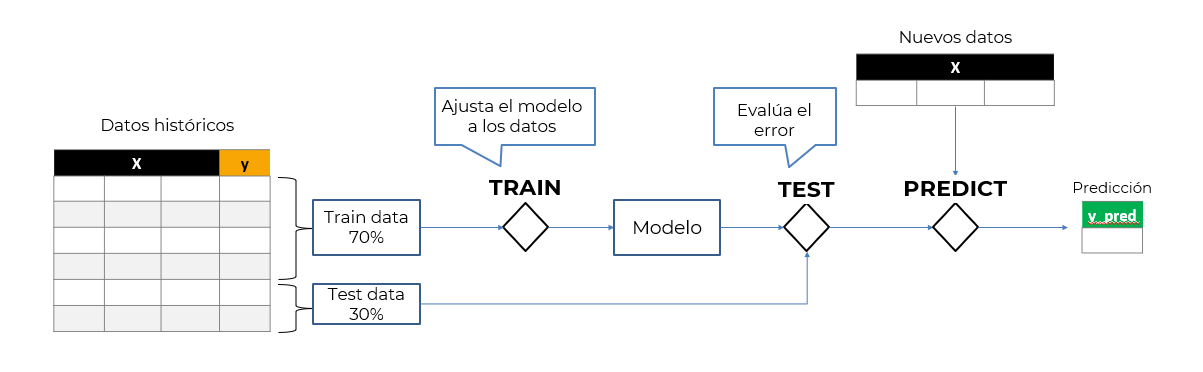

## Split X-y

In [28]:
target = 'lluvia_D+1'

In [29]:
# En clasificación, el target es booleano (True/False)
df[target] = df[target].astype('bool')

In [30]:
features = [i for i in df.columns if i != target]

In [31]:
y = df[target]
X = df[features]

## Target: distribucion

In [32]:
y.value_counts()     # Distribucion

lluvia_D+1
False    5308
True     1500
Name: count, dtype: int64

In [33]:
y.value_counts() / df.shape[0]  # Distribucion en %

lluvia_D+1
False    0.779671
True     0.220329
Name: count, dtype: float64

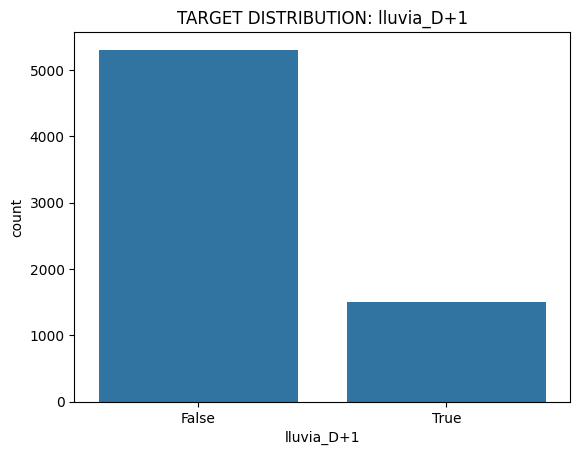

In [34]:
sns.countplot(x=y)
plt.title('TARGET DISTRIBUTION: '+target)
plt.show()

## Split train-test

Para separar los datos entre TRAIN-TEST tenemos 2 opciones:
* **HOLDOUT**, utilizaremos ultimos dias para TEST. La más coherente si el objetivo del modelo es hacer predicciones a futuro.
* **RANDOM HOLDOUT**, utilizando un set random de observaciones para TEST. Cuando el componente temporal en la prediccion no es importante.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# HOLDOUT
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size = 0.30, # tamaño del split aleatorio
                                        shuffle = False,
                                        #stratify=y
                                    )

In [37]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 4765
Test data instances: 2043


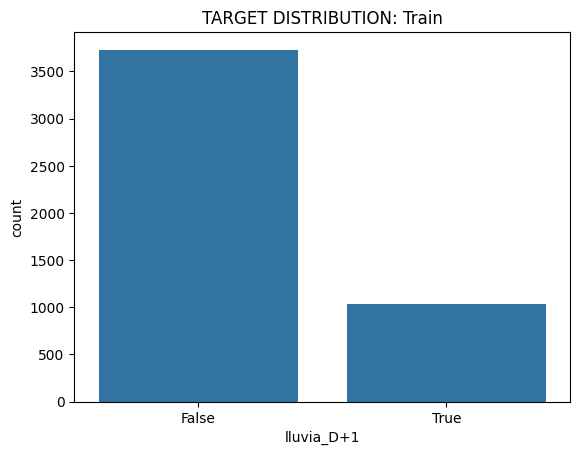

In [38]:
sns.countplot(x=y_train)
plt.title('TARGET DISTRIBUTION: Train')
plt.show()

In [39]:
y_train.value_counts() / len(y_train)  # Distribucion en %

lluvia_D+1
False    0.783211
True     0.216789
Name: count, dtype: float64

In [40]:
y_test.value_counts() / len(y_test)  # Distribucion en %

lluvia_D+1
False    0.771415
True     0.228585
Name: count, dtype: float64

## Rescaling

¿Vamos a entrenar un modelo lineal o de distancias? -> NO. Por lo que no es necesario estandarizar los datos.

## TRAIN

Vamos a implementar el algoritmo Gradient Boosting Classifier (GBM) para entrenar un modelo de CLASIFICACIÓN, entrenando con los datos de TRAIN. Veremos más adelante como funcionan los distintos algoritmos ML. Utilizaremos algoritmos distribuidos a través de librerias de Python, principalmente scikit-learn.

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
model = GradientBoostingClassifier()  # declara el algoritmo del modelo ML -> Algoritmo ML + Datos = Modelo ML

In [43]:
model.fit(X_train, y_train)           # fit(): entrena el modelo ML con los datos de train

GradientBoostingClassifier()

In [44]:
model.predict(X_test)

array([False, False, False, ..., False, False, False])

In [45]:
model.predict_proba(X_test)[:,1]

array([0.15365371, 0.06866585, 0.0378469 , ..., 0.16182493, 0.15695005,
       0.10620938])

In [46]:
X_show = X_test.copy()
X_show["target_real"] = y_test
X_show["prediccion"] = model.predict(X_test)
X_show["prediccion_proba"] = model.predict_proba(X_test)[:,1]
X_show.head(15)

,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W,target_real,prediccion,prediccion_proba
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-05-28,22.0,17.0,13.0,13.0,10.0,5.0,94.0,62.0,33.0,1020,1016,1014,10.0,10.0,10.0,16,10,53.0,0.0,3.0,0,0,0,0,0,False,False,True,False,False,False,False,False,False,False,0.153654
2010-05-29,27.0,18.0,10.0,11.0,8.0,3.0,94.0,53.0,21.0,1024,1022,1020,10.0,10.0,10.0,16,6,24.0,0.0,2.0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,False,0.068666
2010-05-30,30.0,21.0,12.0,11.0,9.0,8.0,82.0,48.0,25.0,1026,1024,1022,10.0,10.0,10.0,16,5,24.0,0.0,1.0,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,0.037847
2010-05-31,31.0,22.0,14.0,13.0,11.0,9.0,82.0,48.0,25.0,1024,1022,1019,10.0,10.0,10.0,21,6,24.0,0.0,1.0,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,0.050429
2010-06-01,32.0,23.0,16.0,13.0,11.0,7.0,77.0,45.0,21.0,1020,1017,1015,10.0,10.0,10.0,23,8,24.0,0.0,1.0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,False,0.065571
2010-06-02,30.0,24.0,18.0,11.0,9.0,7.0,64.0,43.0,23.0,1017,1015,1013,10.0,10.0,10.0,13,8,24.0,0.0,1.0,0,0,0,0,0,False,False,True,False,False,False,False,False,False,False,0.146770
2010-06-03,32.0,23.0,16.0,11.0,9.0,7.0,68.0,40.0,21.0,1014,1013,1011,10.0,10.0,10.0,13,6,24.0,0.0,1.0,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,0.115748
2010-06-04,33.0,24.0,15.0,11.0,8.0,5.0,72.0,38.0,17.0,1018,1017,1015,10.0,10.0,10.0,19,8,45.0,0.0,1.0,0,0,0,0,0,False,False,True,False,False,False,False,False,False,False,0.056481
2010-06-05,34.0,26.0,17.0,15.0,11.0,8.0,64.0,41.0,20.0,1019,1017,1015,10.0,10.0,10.0,19,6,52.0,0.0,1.0,0,0,0,0,0,False,False,False,False,False,False,False,True,False,False,0.068197


## TEST

Para evaluar el performance del modelo comparamos el dato real (y) con la prediccion (y_pred), a la hora de evaluar mediremos el performance en TRAIN y TEST:
* El error en TEST es el error que estimamos se producirá en el PREDICT.
* La comparativa TRAIN vs TEST nos ayuda a identificar posible OVERFITTING en el ajuste.<br><br>
Las principales métricas de EVALUACIÓN en CLASIFICACIÓN son:
* **AUC y ROC Cruve**
* Confusion Matrix
* Accuracy, precision, recall, F1-score

In [47]:
y_train_pred = model.predict(X_train)                        # predicciones del modelo en los datos de TRAIN
y_test_pred = model.predict(X_test)                          # predicciones del modelo en los datos de TEST

In [48]:
y_train_pred_proba = model.predict_proba(X_train)[:, 1]      # probabilidad de éxito (1) segun el modelo en los datos de TRAIN
y_test_pred_proba = model.predict_proba(X_test)[:, 1]        # probabilidad de éxito (1) segun el modelo en los datos de TEST

* AUC

In [49]:
from sklearn.metrics import roc_auc_score

In [50]:
auc_train = roc_auc_score(y_train, y_train_pred_proba)      # AUC en TRAIN
auc_test = roc_auc_score(y_test, y_test_pred_proba)         # AUC en TEST

In [51]:
print('AUC Train:', round(auc_train,4))
print('AUC Test:', round(auc_test,4))

AUC Train: 0.8676
AUC Test: 0.7912


* ROC Curve

In [52]:
from sklearn.metrics import roc_curve

In [53]:
# metrics for ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

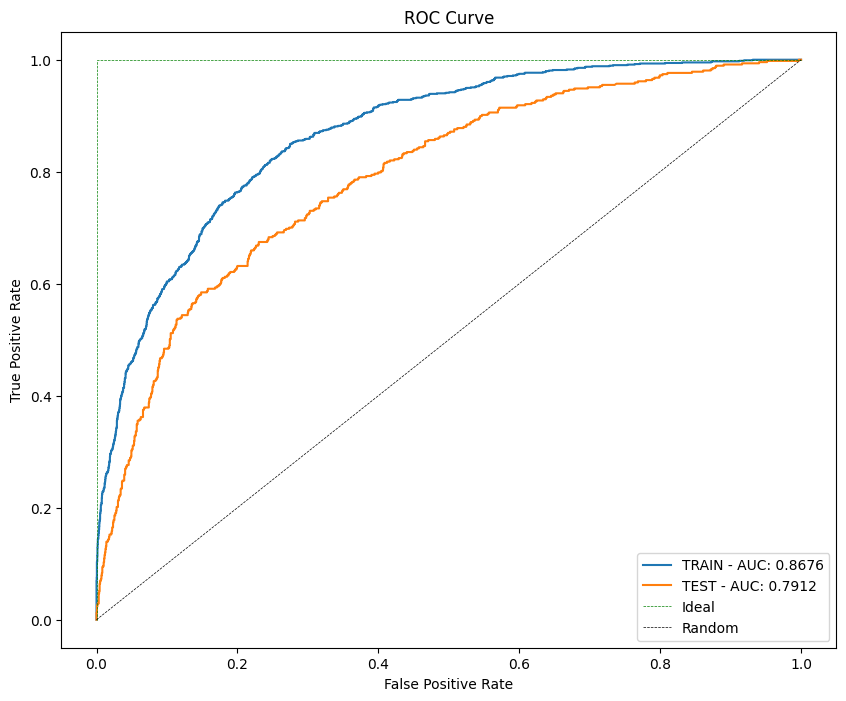

In [54]:
#Plot
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

* Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [56]:
cm_test = confusion_matrix(y_test, y_test_pred)

[]

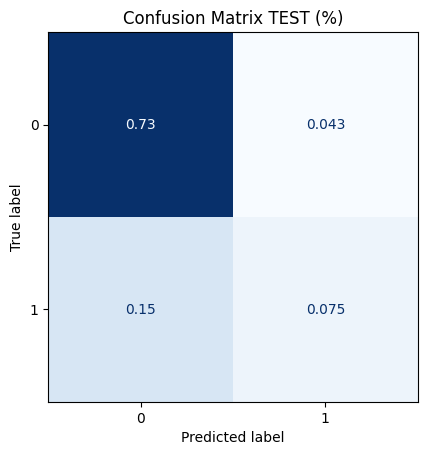

In [57]:
ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test)).plot(colorbar = False, cmap = 'Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()

* Accuracy, Precision, Recall y F1-Score

In [58]:
cm_test

array([[1489,   87],
       [ 314,  153]])

In [59]:
TN = cm_test[0,0]
TP = cm_test[1,1]
FP = cm_test[0,1]
FN = cm_test[1,0]
total = len(y_test)

In [60]:
# Rellenar
accuracy_test = (TN+TP)/total
precision_test = TP/(TP+FP)
recall_test = TP/(TP+FN)
f1_test = 2/(1/recall_test + 1/precision_test)

In [61]:
print('Accuracy:',round(accuracy_test,4))
print('Precision:',round(precision_test,4))
print('Recall:',round(recall_test,4))
print('F1-score:',round(f1_test,4))

Accuracy: 0.8037
Precision: 0.6375
Recall: 0.3276
F1-score: 0.4328


O directamente de sklearn:

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', round( accuracy_score(y_test, y_test_pred),4))
print('Precision:', round( precision_score(y_test, y_test_pred), 4))
print('Recall:', round( recall_score(y_test, y_test_pred), 4))
print('F1-score:', round(f1_score(y_test, y_test_pred), 4))

Accuracy: 0.8037
Precision: 0.6375
Recall: 0.3276
F1-score: 0.4328


## Interpretabilidad

* Además de la evaluación del performance del modelo, es importante interpretar cual es la definición del modelo tras entrenarse. Es crucial entender cuales son las variables más determinantes en el modelo a la hora de realizar una predicción.
* A la hora de interpretar un modelo utilizaremos:
  * **SHAP values** en modelos de ARBOLES DE DECISION
  * Coeficientes en modelos LINEALES

In [63]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 2.8 MB/s eta 0:00:00


In [64]:
import shap

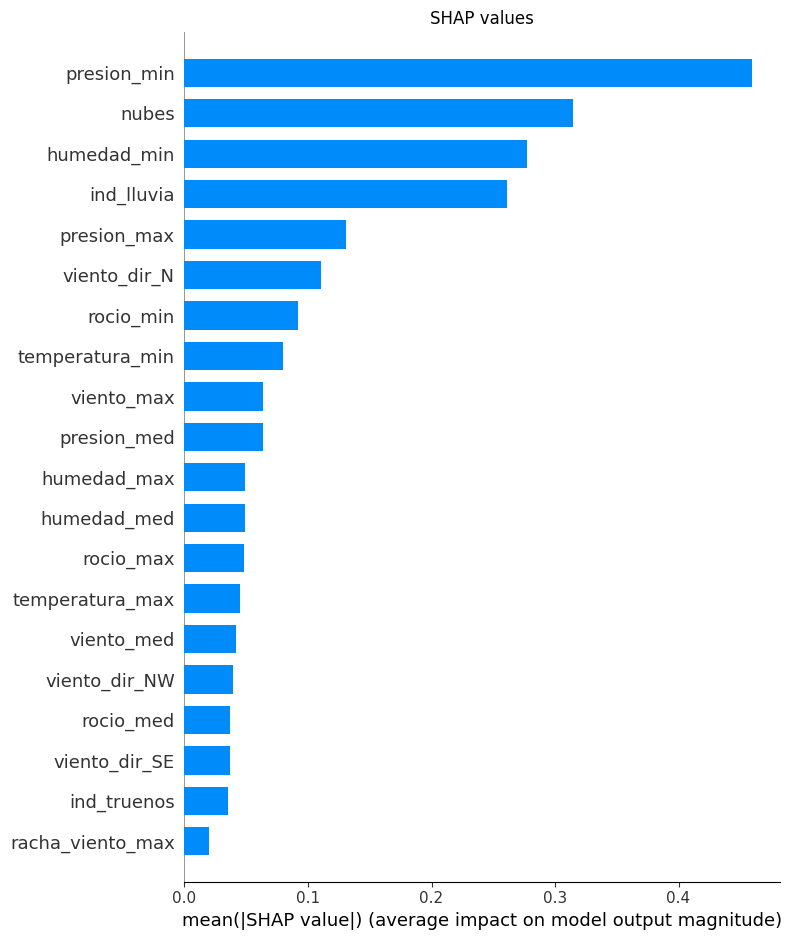

In [65]:
#SHAP value: peso en el output final
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)

Los SHAP values nos indican ademas el sentido del impacto que tiene la variable en la predicción (positivo/negativo):
* Rojo a la derecha = POSITIVO (+)
* Rojo a la izquierda = NEGATIVO (-)

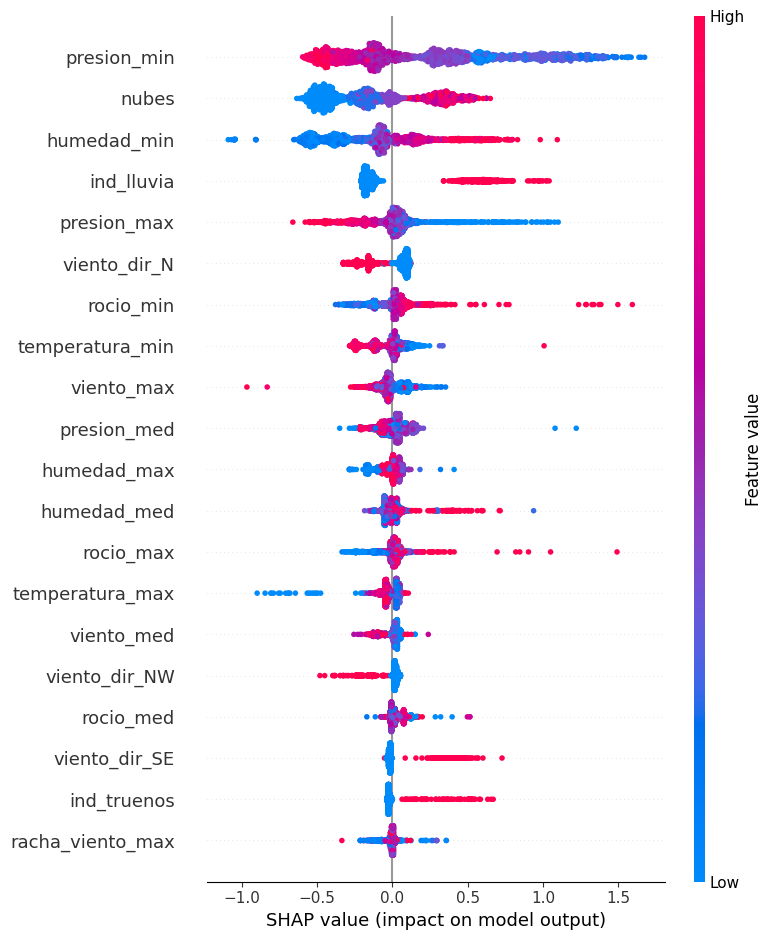

In [66]:
shap.summary_plot(shap_values, X_test)

## Guardar modelo

In [ ]:
import pickle
pickle.dump(model, open('/content/drive/MyDrive/Machine Learning/lluvia predecir.csv'))

# PREDICT

## Cargar nuevos datos

En la practica habria que aplicar de vuelta las mismas tecnicas de preprocessing aplicadas anteriormente para limpiar los nuevos datos. A modo didáctico, trabajaremos directamente con una muestra ya preprocesada para hacer el predict.

In [69]:
sample_predict = pd.read_csv('/content/drive/MyDrive/Machine Learning/lluvia predecir.csv',index_col=0)
sample_predict.T

,2022-12-28
temperatura_max,15.00
temperatura_med,8.00
temperatura_min,2.00
rocio_max,8.00
rocio_med,4.00
rocio_min,1.00
humedad_max,100.00
humedad_med,78.00
humedad_min,34.00
presion_max,1031.00


## Cargar modelo

In [ ]:
import pickle
model = pickle.load(open('/content/drive/MyDrive/TIC/Data science/Master Data Science Nuclio - profesor/Aprendizaje supervisado - Presencial/Ejercicios/Clasificación - lluvia/modelo_entrenado.pkl', 'rb'))

In [ ]:
# Check features matched features model
features_predict = list(sample_predict.columns)
model_features = list(model.feature_names_in_)

In [ ]:
model.feature_names_in_

In [ ]:
features_predict == model_features

## ¿Mañana llueve?

In [ ]:
predict = model.predict(sample_predict)[0]

In [ ]:
predict_proba = model.predict_proba(sample_predict)[:,1][0]

In [ ]:
print('Mañana llueve:',predict)
print('Probabilidad de lluvia: {:.2%}'.format(predict_proba))